# Project 2: Digit Recognition

## Statistical Machine Learning (COMP90051), Semester 2, 2017

*Copyright the University of Melbourne, 2017*

### Submitted by:  *Yuqing He*
### Student number: *744973*
### Kaggle-in-class username: *your username here*

In this project, you will be applying machine learning for recognising digits from real world images. The project worksheet is a combination of text, pre-implemented code and placeholders where we expect you to add your code and answers. You code should produce desired result within a reasonable amount of time. Please follow the instructions carefully, **write your code and give answers only where specifically asked**. In addition to worksheet completion, you are also expected to participate **live competition with other students in the class**. The competition will be run using an on-line platform called Kaggle.

** Marking:** You can get up to 33 marks for Project 2. The sum of marks for Project 1 and Project 2 is then capped to 50 marks

**Due date:** Wednesday 11/Oct/17, 11:59pm AEST (LMS components); and Kaggle competition closes Monday 09/Oct/17, 11:59pm AEST.

**Late submissions** will incur a 10% penalty per calendar day

** Submission materials**
 - **Worksheet**: Fill in your code and answers within this IPython Notebook worksheet.
 - **Competition**: Follow the instructions provided in the corresponding section of this worksheet. Your competition submissions should be made via Kaggle website.
 - **Report**: The report about your competition entry should be submitted to the LMS as a PDF file (see format requirements in `2.2`).
 - **Code**: The source code behind your competition entry.
The **Worksheet**, **Report** and **Code** should be bundled into a `.zip` file (not 7z, rar, tar, etc) and submitted in the LMS. Marks will be deducted for submitting files in other formats, or we may elect not to mark them at all.

**Academic Misconduct:** Your submission should contain only your own work and ideas. Where asked to write code, you cannot re-use someone else's code, and should write your own implementation. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place.

**Table of Contents**

1. Handwritten Digit Recognition **(16 marks)**
  1. Linear Approach
  2. Basis Expansion
  3. Kernel Perceptron
  4. Dimensionality Reduction
  
2. Kaggle Competition **(17 marks)**
  1. Making Submissions
  2. Method Description

## 1. Handwritten Digit Recognition
Handwritten digit recognition can be framed as a classification task: given a bitmap image as input, predict the digit type (0, 1, ..., 9). The pixel values in each position of the image form our features, and the digit type is the class. We are going to use a dataset where the digits are represented as *28 x 28* bitmap images. Each pixel value ranges between 0 and 1, and represents the monochrome ink intensity at that position. Each image matrix has been flattened into one long feature vector, by concatenating each row of pixels.

In this part of the project, we will only use images of two digits, namely "7" and "9". As such, we will be working on a binary classification problem. *Throughout this first section, our solution is going to be based on the perceptron classifier.*

Start by setting up working environment, and loading the dataset. *Do not override variable `digits`, as this will be used throughout this section.*

In [1]:
%pylab inline

digits = np.loadtxt('digits_7_vs_9.csv', delimiter=' ')

Populating the interactive namespace from numpy and matplotlib


Take some time to explore the dataset. Note that each image of "7" is labeled as -1, and each image of "9" is labeled as +1.

[-1.]


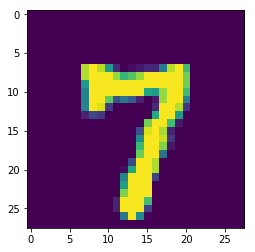

In [2]:
# extract a stack of 28x28 bitmaps
X = digits[:, 0:784]

# extract labels for each bitmap
y = digits[:, 784:785]

# display a single bitmap and print its label
bitmap_index = 0
plt.imshow(X[bitmap_index,:].reshape(28, 28), interpolation=None)
print(y[bitmap_index])

You can also display several bitmaps at once using the following code.

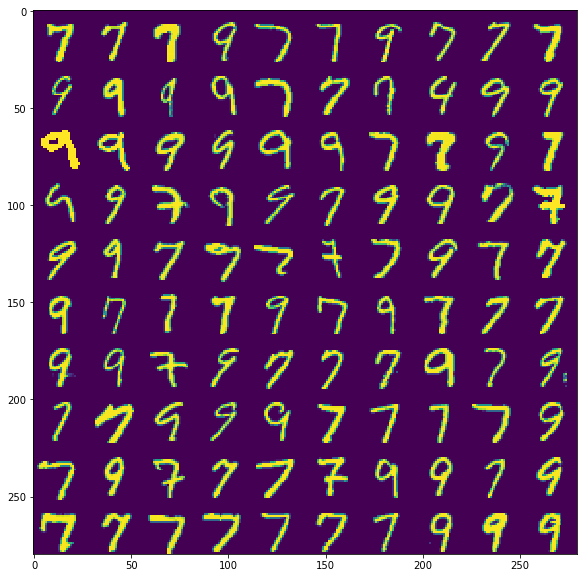

In [3]:
def gallery(array, ncols):
    nindex, height, width = array.shape
    nrows = nindex//ncols
    result = (array.reshape((nrows, ncols, height, width))
              .swapaxes(1,2)
              .reshape((height*nrows, width*ncols)))
    return result

ncols = 10
result = gallery(X.reshape((300, 28, 28))[:ncols**2], ncols)
plt.figure(figsize=(10,10))
plt.imshow(result, interpolation=None)

### 1.1 Linear Approach
We are going to use perceptron for our binary classification task. Recall that perceptron is a linear method. Also, for this first step, we will not apply non-linear transformations to the data.

Implement and fit a perceptron to the data above. You may use the implementation from *sklearn*, or implementation from one of our workshops. Report the error of the fit as the proportion of misclassified examples.

<br />

<font color='red'>**Write your code in the cell below ...**</font>

In [4]:
## your code here
from sklearn.linear_model import Perceptron
clf = Perceptron(fit_intercept = True, n_iter=100, eta0 =0.002, random_state = None, verbose = 0)
new_y = np.ravel(y)
clf.fit(X, new_y)
w = clf.coef_
training_results = clf.predict(X)
acc = clf.score(X,new_y)
result = (training_results == new_y).sum()
for i in range (0,50):
    if not training_results[i] == new_y[i]:
        plt.imshow(X[i,:].reshape(28, 28), interpolation=None)
        
print('The proportion of misclassified examples is:',1-acc)


The proportion of misclassified examples is: 0.0


One of the advantages of a linear approach is the ability to interpret results. To this end, plot the parameters learned above. Exclude the bias term if you were using it, set $w$ to be the learned perceptron weights, and run the following command.

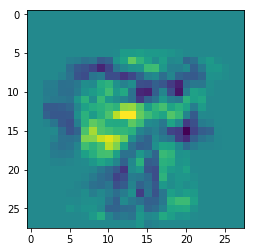

In [5]:
plt.imshow(w.reshape(28,28), interpolation=None)

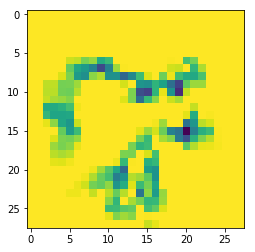

In [6]:
new_w = w.copy()
new_w[new_w >0] = 0
plt.imshow(new_w.reshape(28,28), interpolation=None)

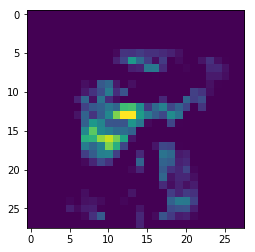

In [7]:
seven_w = w.copy()
seven_w[seven_w <0] = 0
plt.imshow(seven_w.reshape(28,28), interpolation=None)

In a few sentences, describe what you see, referencing which features are most important for making classification. Report any evidence of overfitting.

<font color='red'>From the two images above, I print the important features for both 9 and 7. We found that the most import features is in range of which is for x-axis is from 7 to 15, while y-axis is from 15 to 20. If The input data show 1 in this area it will be considered as 9, otherwise, it will be considered as 7.<br/></font> 

<font color='red'>For 7, it overfitting in range of 0-5 in x-axis and 10-20 in y-axixs. This part is unnecessary for identify if this picture is 9 or 7</font> 

Split the data into training and heldout validation partitions by holding out a random 25% sample of the data. Evaluate the error over the course of a training run, and plot the training and validation error rates as a function of the number of passes over the training dataset.

<br />
<font color='red'>**Write your code in the cell below ...**</font>

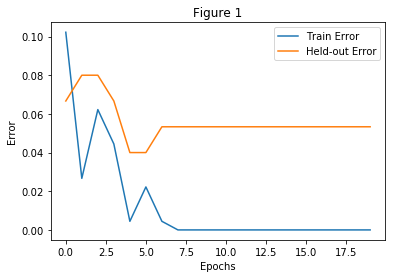

In [8]:
# ## your code here
data = digits.copy()
# error_test = []
# error_train = []
# for i in range(0, 100):
np.random.shuffle(data)

train_data = data[:225]
test_data = data[225:]

train_X = train_data[:, 0:784]
train_y = train_data[:, 784:785]
test_X = test_data[:, 0:784]
test_y = test_data[:, 784:785]

def perc_pred(phi, w):
    return np.sign(np.dot(phi, w)+0.5)

def train(data, target, epochs, w , eta= 0.002):
    for e in range(epochs):
        for i in range(data.shape[0]):
            yhat = perc_pred(data[i,:], w)
            if yhat != target[i]:
                w += eta * target[i] * data[i]
    return w



train_Phi = np.column_stack([np.ones(train_X.shape[0]), train_X])
test_Phi = np.column_stack([np.ones(test_X.shape[0]), test_X])

new_train_y = np.ravel(train_y)
new_test_y = np.ravel(test_y)


w_hat = np.zeros(train_Phi.shape[1])
T = 20
train_error = np.zeros(T)
heldout_error = np.zeros(T)
for ep in range(T):
    # here we use a learning rate, which decays with each epoch
    lr = 1./(1+ep)
    w_hat = train(train_Phi, new_train_y, 1, w_hat, eta = lr )
    
    train_error[ep] = np.sum(perc_pred(train_Phi, w_hat) != new_train_y) / np.float(new_train_y.shape[0])
    heldout_error[ep] = np.sum(perc_pred(test_Phi, w_hat) != new_test_y) / np.float(new_test_y.shape[0])

plot(train_error, label = 'Train Error')
plot(heldout_error, label = 'Held-out Error')
plt.legend()
plt.title('Figure 1')
xlabel('Epochs')
ylabel('Error')


In a few sentences, describe the shape of the curves, and compare the two. Now consider if we were to stop training early, can you choose a point such that you get the best classification performance? Justify your choice.

<font color='red'>These two curves will drop down at first and then keep a fix value after a certain time. The train error will drop down to 0 finally, while the error of test data will arrive a steady point larger than 0 and this steady value may be change because of the different split to train and test dataset<br/></font>
<font color='red'> If we want to stop training early, I perfer to choose Epochs = 10. From the figure above, we can found that the value is almost fixed after Epochs larger than 10. </font>

Now that we have tried a simple approach, we are going to implement several non-linear approaches to our task. Note that we are still going to use a linear method (the perceptron), but combine this with a non-linear data transformation. We start with basis expansion.

### 1.2 Basis Expansion
Apply Radial Basis Function (RBF)-based transformation to the data, and fit a perceptron model. Recall that the RBF basis is defined as

$$\varphi_l(\mathbf{x}) =  \exp\left(-\frac{||\mathbf{x} - \mathbf{z}_l||^2}{\sigma^2}\right)$$

where $\mathbf{z}_l$ is centre of the $l^{th}$ RBF. We'll use $L$ RBFs, such that $\varphi(\mathbf{x})$ is a vector with $L$ elements. The spread parameter $\sigma$ will be the same for each RBF.

*Hint: You will need to choose the values for $\mathbf{z}_l$ and $\sigma$. If the input data were 1D, the centres $\mathbf{z}_l$ could be uniformly spaced on a line. However, here we have 784-dimensional input. For this reason you might want to use some of the training points as centres, e.g., $L$ randomly chosen "2"s and "7"s.*

<br />

<font color='red'>**Write your code in the cell below ...**</font>

In [9]:
## your code here

from sklearn.metrics.pairwise import rbf_kernel

rbf_data = X.copy()
np.random.shuffle(rbf_data)
centres = rbf_data[:30]

new_X = rbf_kernel(X, centres, 0.1)
new_y = np.ravel(y)
clf_rbf = Perceptron(fit_intercept = True, n_iter=1, eta0 =0.002, random_state = None, verbose = 0)
clf_rbf.fit(new_X, new_y)
acc = clf_rbf.score(new_X,new_y)
print ('The error for training test is:', 1-acc)


The error for training test is: 0.463333333333


Now compute the validation error for your RBF-perceptron and use this to choose good values of $L$ and $\sigma$. Show a plot of the effect of changing each of these parameters, and justify your parameter choice.

<br />

<font color='red'>**Write your code in the cell below ...**</font>

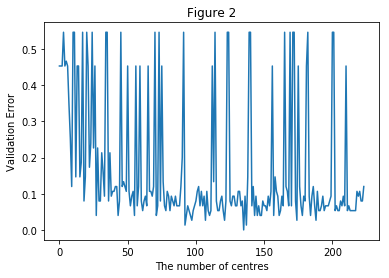

In [10]:
import random
sigma = 0.5

def center(x,L):
    return random.sample(list(x),L)
clf_rbf_L = Perceptron(fit_intercept = True, n_iter=100, eta0 =0.002, random_state = None, verbose = 0)
valid_err = []
for L in range(1,225):
    z = center(train_X, L)
    rbf_X_train = rbf_kernel(train_X, z, sigma)
    rbf_X_test = rbf_kernel(test_X, z, sigma)
    clf_rbf_L.fit(rbf_X_train, new_train_y)
    acc_rbf_L= clf_rbf_L.score(rbf_X_test,new_test_y)
    valid_err.append(1-acc_rbf_L)
plot(valid_err)
plt.title('Figure 2')
xlabel('The number of centres')
ylabel('Validation Error')

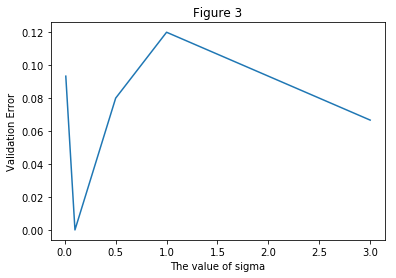

In [11]:
## your code here
# train_X = train_data[:, 0:784]
# train_y = train_data[:, 784:785]
# test_X = test_data[:, 0:784]
# test_y = test_data[:, 784:785]
# new_train_y = np.ravel(train_y)
# new_test_y = np.ravel(test_y)

sigma_set = [0.01,0.1,0.5,1,3]
clf_rbf_sigma = Perceptron(fit_intercept = True, n_iter=100, eta0 =0.002, random_state = None, verbose = 0)
valid_err_sigma = []
for sigma in sigma_set:
    rbf_X_train = rbf_kernel(train_X, train_X, sigma)
    rbf_X_test = rbf_kernel(test_X, train_X, sigma)
    clf_rbf_sigma.fit(rbf_X_train, new_train_y)
    acc_sigma = clf_rbf_sigma.score(rbf_X_test,new_test_y)
    valid_err_sigma.append(1-acc_sigma)
plot(sigma_set,valid_err_sigma)
plt.title('Figure 3')
xlabel('The value of sigma')
ylabel('Validation Error')
    

<font color='red'>From two figures above, we can found the influence on the change of L and sigma. From Figure 2, we can found that the error is larger when the size of L less than 50. With the increasing of the size of L, the error will be reduced slowly generally, however, it shows the violent volatility in some values. When the size of L approach to the size of training, the number of values which show a sudden change decrease and overall trend become much more stable。 So I choose all the training set as my centres or as L.<br/> </font>
<font color= 'red'>From Figure 3, we can found that when the value of sigma is about 0.1, the validation error is minimum value. However, with the change of training set and test set. The value of sigma which can obtain the minimun error rate is changeable, and the best value sigma will be in range 0 to 1.

### 1.3 Kernel Perceptron
Next, instead of directly computing a feature space transformation, we are going to use the kernel trick. Specifically, we are going to use the kernelised version of perceptron in combination with a few different kernels.

*In this section, you cannot use any libraries other than `numpy` and `matplotlib`.*

First, implement linear, polynomial and RBF kernels. The linear kernel is simply a dot product of its inputs, i.e., there is no feature space transformation. Polynomial and RBF kernels should be implemented as defined in the lecture slides.

<br />

<font color='red'>**Write your code in the cell below ...**</font>

In [12]:
# Input:
# u,v - column vectors of the same dimensionality
#
# Output:
# v - a scalar
def linear_kernel(u, v):
    ## your code here
    return np.dot(u.T,v)


# Input:
# u,v - column vectors of the same dimensionality
# c,d - scalar parameters of the kernel as defined in lecture slides
#
# Output:
# v - a scalar
def polynomial_kernel(u, v, c=0, d=3):
    return (np.dot(u.T,v) + c)**d
    ## your code here

# Input:
# u,v - column vectors of the same dimensionality
# gamma - scalar parameter of the kernel as defined in lecture slides
#
# Output:
# v - a scalar
def rbf_kernel(u, v, gamma=1):
    return np.exp(-np.linalg.norm(u-v)**2 * gamma)
    ## your code here

Kernel perceptron was a "green slides" topic, and you will not be asked about this method in the exam. Here, you are only asked to implement a simple prediction function following the provided equation. In kernel perceptron, the prediction for instance $\mathbf{x}$ is made based on the sign of

$$w_0 + \sum_{i=1}^{n}\alpha_i y_i K(\mathbf{x}_i, \mathbf{x})$$

Here $w_0$ is the bias term, $n$ is the number of training examples, $\alpha_i$ are learned weights, $\mathbf{x}_i$ and $y_i$ is the training dataset,and $K$ is the kernel.

<br />

<font color='red'>**Write your code in the cell below ...**</font>

In [13]:
# Input:
# x_test - (r x m) matrix with instances for which to predict labels
# X - (n x m) matrix with training instances in rows
# y - (n x 1) vector with labels
# alpha - (n x 1) vector with learned weigths
# bias - scalar bias term
# kernel - a kernel function that follows the same prototype as each of the three kernels defined above
#
# Output:
# y_pred - (r x 1) vector of predicted labels
def kernel_ptron_predict(x_test, X, y, alpha, bias, kernel):
    ## your code here
#     count = 0
#     for i in range (0, X.shape[0]):
#         count = alpha[i] * y[i] * kernel(x_test, X[i])
#     return np.sign(bias + count)
    y_predicts = np.zeros(x_test.shape[0])
#     print(y_predicts.shape)
    for i in range(x_test.shape[0]):
        y_predicts[i] = bias
        for j in range(X.shape[0]):
            y_predicts[i] += alpha[j]*y[j]*kernel(X[j],x_test[i])
    return np.sign(y_predicts).reshape(-1,1)

The code for kernel perceptron training is provided below. You can treat this function as a black box, but we encourage you to understand the implementation.

In [14]:
# Input:
# X - (n x m) matrix with training instances in rows
# y - (n x 1) vector with labels
# kernel - a kernel function that follows the same prototype as each of the three kernels defined above
# epochs - scalar, number of epochs
#
# Output:
# alpha - (n x 1) vector with learned weigths
# bias - scalar bias term
def kernel_ptron_train(X, y, kernel, epochs=100):
    n, m = X.shape
    alpha = np.zeros(n)
    bias = 0
    updates = None
    for epoch in range(epochs):
        print('epoch =', epoch, ', updates =', updates)
        updates = 0

        schedule = list(range(n))
        np.random.shuffle(schedule)
        for i in schedule:
            y_pred = kernel_ptron_predict(X[i].reshape(1,-1), X, y, alpha, bias, kernel)
            
            if y_pred != y[i]:
                alpha[i] += 1
                bias += y[i]
                updates += 1

        if updates == 0:
            break
        
    return alpha, bias

Now use the above functions to train the perceptron. Use heldout validation, and compute the validation error for this method using each of the three kernels. Write a paragraph or two with analysis how the accuracy differs between the different kernels and choice of kernel parameters. Discuss the merits of a kernel approach versus direct basis expansion approach as was used in the previous section.

<br />

<font color='red'>**Write your code in the cell below ...**</font>

In [15]:

# ## your code here
data_kernel = digits.copy()


np.random.shuffle(data_kernel)
train_data_kernel = data_kernel[:225]
test_data_kernel = data_kernel[225:]
train_X_kernel = train_data_kernel[:, 0:784]
train_y_kernel = train_data_kernel[:, 784:785]
test_X_kernel = test_data_kernel[:, 0:784]
test_y_kernel = test_data_kernel[:, 784:785]

alpha, bias = kernel_ptron_train(train_X_kernel, train_y_kernel, linear_kernel, epochs=100)
    
linear_predic = kernel_ptron_predict(test_X_kernel, train_X_kernel, train_y_kernel, alpha, bias, linear_kernel)     
wrong_number = np.sum(linear_predic != test_y_kernel)

error =np.sum(linear_predic != test_y_kernel)/float(75)
        
print('Mean of validation error in linear kernel is:', error)
    


epoch = 0 , updates = None
epoch = 1 , updates = 33
epoch = 2 , updates = 10
epoch = 3 , updates = 8
epoch = 4 , updates = 2
Mean of validation error in linear kernel is: 0.106666666667


In [16]:
# ## your code here
data_kernel = digits.copy()
# error_test = []
# error_train = []
# for i in range(0, 100):

np.random.shuffle(data_kernel)
train_data_kernel = data_kernel[:225]
test_data_kernel = data_kernel[225:]
train_X_kernel = train_data_kernel[:, 0:784]
train_y_kernel = train_data_kernel[:, 784:785]
test_X_kernel = test_data_kernel[:, 0:784]
test_y_kernel = test_data_kernel[:, 784:785]
    
alpha, bias = kernel_ptron_train(train_X_kernel, train_y_kernel, polynomial_kernel, epochs=100)
poly_predic = kernel_ptron_predict(test_X_kernel, train_X_kernel, train_y_kernel, alpha, bias, polynomial_kernel)
validation_error_poly = np.sum(poly_predic != test_y_kernel)/ float(75)
    
print('Mean of validation error in polynomial kernel is:', validation_error_poly)

epoch = 0 , updates = None
epoch = 1 , updates = 27
epoch = 2 , updates = 6
Mean of validation error in polynomial kernel is: 0.04


In [17]:
# ## your code here
data_kernel = digits.copy()
# error_test = []
# error_train = []
# for i in range(0, 100):


np.random.shuffle(data_kernel)
train_data_kernel = data_kernel[:225]
test_data_kernel = data_kernel[225:]
train_X_kernel = train_data_kernel[:, 0:784]
train_y_kernel = train_data_kernel[:, 784:785]
test_X_kernel = test_data_kernel[:, 0:784]
test_y_kernel = test_data_kernel[:, 784:785]
    
alpha, bias = kernel_ptron_train(train_X_kernel, train_y_kernel, rbf_kernel, epochs=100)
rbf_predic = kernel_ptron_predict(test_X_kernel, train_X_kernel, train_y_kernel, alpha, bias, rbf_kernel)
validation_error_rbf = np.sum(rbf_predic != test_y_kernel)/ float(75)
    
print('Mean of validation error in rbf kernel is:', validation_error_rbf)

epoch = 0 , updates = None
epoch = 1 , updates = 38
epoch = 2 , updates = 18
epoch = 3 , updates = 4
Mean of validation error in rbf kernel is: 0.0933333333333


<font color='red'>The parameters in polynomial kernel is c and d. d control the complexity of model. When d get larger, the power of x will increase and the complexity of model will increase. The more complex of the data, the more overfitting may happen. c is another parameter in polynomial kernel which is constant number to adjust the accuracy of polynomial kernel. A good c can increase the accuracy in a certain range<br/> </font> 
<font color = 'red'> The parameter in rbf kernel is sigma. sigma is a constant which effect the the accuracy of predict. By choosing a good value of sigma. The accuarcy of rbf kernel can increase <br/> </font>


<font color = 'red'>The accuracy of these three kernel are alomost same among this data. Linear kernel show a good performace because the data can be split by linear. For polynomial kernel, if the d can be set to 2 or 3, the performace of this kernel will be better. For rbf kernel,if the centres and sigma is proper, the the performace will also good<br/> </font>

<font color = 'red'>Kernel method can operate more quickly and it can deal with the matrix data. Howerver, rbf just can deal with the vector data and the speed is much slower than kernel. However, the kernel method it is harder to understand because it's proccess is not direct.<br/> </font>

### 1.4 Dimensionality Reduction
Yet another approach to working with complex data is to use a non-linear dimensionality reduction. To see how this might work, first apply a couple of dimensionality reduction methods and inspect the results.

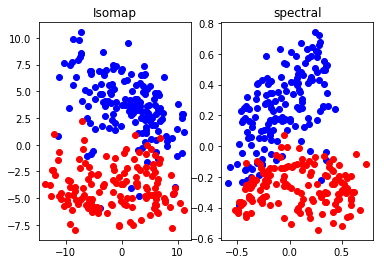

In [18]:
from sklearn import manifold

X = digits[:, 0:784]
y = np.squeeze(digits[:, 784:785])

# n_components refers to the number of dimensions after mapping
# n_neighbors is used for graph construction
X_iso = manifold.Isomap(n_neighbors=30, n_components=2).fit_transform(X)

# n_components refers to the number of dimensions after mapping
embedder = manifold.SpectralEmbedding(n_components=2, random_state=0)
X_se = embedder.fit_transform(X)

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(X_iso[y==-1,0], X_iso[y==-1,1], "bo")
ax1.plot(X_iso[y==1,0], X_iso[y==1,1], "ro")
ax1.set_title('Isomap')
ax2.plot(X_se[y==-1,0], X_se[y==-1,1], "bo")
ax2.plot(X_se[y==1,0], X_se[y==1,1], "ro")
ax2.set_title('spectral')

In a few sentences, explain how a dimensionality reduction algorithm can be used for your binary classification task.

<font color='red'>In this task, the features of X is 784, which is too many and it also may includes some redundant features which may cause the a larger number of unnecessary computation and may effect the final accuracy of result. By reducing dimension, we can get more useful and relative features and improve the speed of computation , while it will also save the resources. By using dimensionality reduction algorithms, the original 784 features will be reduce to 2 features and the shape of X becomw (300,2) from (300, 784). We will use this new X as data and split it to train and test dataset. The tarin set will be used to train a prediction model and the test set will be used to test the accuracy of the model. </font>

Implement such an approach and assess the result. For simplicity, we will assume that both training and test data are available ahead of time, and thus the datasets should be used together for dimensionality reduction, after which you can split off a test set for measuring generalisation error. *Hint: you do not have to reduce number of dimensions to two. You are welcome to use the sklearn library for this question.*
 
<br />

<font color='red'>**Write your code in the cell below ...**</font>

In [19]:
from sklearn import manifold
from sklearn.svm import SVC
data_reduct = digits.copy()
reduc_error = []
for i in range (0, 50):
    np.random.shuffle(data_reduct)

    X_reduce = data_reduct[:, 0:784]
    y_reduce = np.squeeze(data_reduct[:, 784:785])

    X_nreduce = manifold.Isomap(n_neighbors=30, n_components = 2).fit_transform(X_reduce)

    train_X_nreduce = X_nreduce[:225]
    test_X_nreduce = X_nreduce[225:]
    train_y_nreduce = y_reduce[:225]
    test_y_nreduce = y_reduce[225:]

    clf_svm = SVC()
    clf_svm.fit(train_X_nreduce, train_y_nreduce)
    predict_y = clf_svm.predict(test_X_nreduce)
    reduc_error.append(np.sum(predict_y != test_y_nreduce)/ float(75))
    
print('Mean of validation error in Dimensionality Reduction is:', np.mean(reduc_error))


Mean of validation error in Dimensionality Reduction is: 0.0698666666667


In a few sentences, comment on the merits of the dimensionality reduction based approach compared to linear classification from Section 1.1 and basis expansion from Section 1.2.

<font color='red'>By compared with Section 1.1, using reduction based approach can prevent overfitting of the train dataset. The redundant and unless features will be deleted or weakened in the new features. As a result, the model will be more meet for generate problem rather than a specific database.<br/></font> 
<font color='red'>Compared with Section 1.2, the features we get from dimensionality reduction is much better than the features we get from rbf_expansion, because the centres we chosen in Section 1.2 is random. By using manifold methods, the useful information we lost in dimensionality reduction is less thsn which we lost in rbf_expension. Therefore, we can get better performance by using dimensionality reduction.

## 2. Kaggle Competition
The final part of the project is a competition, on more challenging digit data sourced from natural scenes. This data is coloured, pixelated or otherwise blurry, and the digits are not perfectly centered. It is often difficult for humans to classify! The dataset is also considerably larger. 

Please sign up to the [COMP90051 Kaggle competition](https://inclass.kaggle.com/c/comp90051-2017) using your `student.unimelb.edu.au` email address. Then download the file `data.npz` from Kaggle. This is a compressed `numpy` data file containing three ndarray objects:
 - `train_X` training set, with 4096 input features (greyscale pixel values);
 - `train_Y` training labels (0-9)
 - `test_X` test set, with 4096 input features, as per above
 
Each image is 64x64 pixels in size, which has been flattened into a vector of 4096 values. You should load the files using `np.load`, from which you can extract the three elements. You may need to transpose the images for display, as they were flattened in a different order. Each pixel has an intensity value between 0-255. For those using languages other than python, you may need to output these objects in another format, e.g., as a matlab matrix.

Your job is to develop a *multiclass* classifier on this dataset. You can use whatever techniques you like, such as the perceptron code from above, or other methods such as *k*NN, logistic regression, neural networks, etc. You may want to compare several methods, or try an ensemble combination of systems. You are free to use any python libraries for this question. Note that some fancy machine learning algorithms can take several hours or days to train (we impose no time limits), so please start early to allow sufficient time. *Note that you may want to sample smaller training sets, if runtime is an issue, however this will degrade your accuracy. Sub-sampling is a sensible strategy when developing your code.*

You may also want to do some basic image processing, however, as this is not part of the subject, we would suggest that you focus most of your efforts on the machine learning. For inspiration, please see [Yan Lecun's MNIST page](http://yann.lecun.com/exdb/mnist/), specifically the table of results and the listed papers. Note that your dataset is harder than MNIST, so your mileage may vary.

### 2.1 Making Submissions

This will be setup as a *Kaggle in class* competition, in which you can upload your system predictions on the test set. You should format your predictions as a csv file, with the same number of lines as the test set, and each line comprising two numbers `id, class` where *id* is the instance number (increasing integers starting from 1) and *class* is an integer between 0-9, corresponding to your system prediction. E.g., 
```
Id,Label
1,9
2,9
3,4
4,5
5,1
...```
based on the first five predictions of the system being classes `9 9 4 5 1`. See the `sample_submission.csv` for an example file.

Kaggle will report your accuracy on a public portion of the test set, and maintain a leaderboard showing the performance of you and your classmates. You will be allowed to upload up to four submissions each day. At the end of the competition, you should nominate your best submission, which will be scored on the private portion of the test set. The accuracy of your system (i.e., proportion of correctly classified examples) on the private test set will be used for grading your approach.

**Marks will be assigned as follows**:
 - position in the class, where all students are ranked and then the ranks are linearly scaled to <br>0 marks (worst in class) - 4 marks (best in class) 
 - absolute performance (4 marks), banded as follows (rounded to nearest integer): 
 <br>below 80% = 0 marks; 80-89% = 1; 90-92% = 2; 93-94% = 3; above 95% = 4 marks

Note that you are required to submit your code with this notebook, submitted to the LMS. Failure to provide your implementation may result in assigning zero marks for the competition part, irrespective of the competition standing. Your implementation should be able to exactly reproduce submitted final Kaggle entry, and match your description below.

### 2.2. Method Description
Describe your approach, and justify each of the choices made within your approach. You should write a document with no more than 400 words, as a **PDF** file (not *docx* etc) with up to 2 pages of A4 (2 sides). Text must only appear on the first page, while the second page is for *figures and tables only*. Please use a font size of 11pt or higher. Please consider using `pdflatex` for the report, as it's considerably better for this purpose than wysiwyg document editors. You are encouraged to include empirical results, e.g., a table of results, graphs, or other figures to support your argument. *(this will contribute 9 marks; note that we are looking for clear presentation, sound reasoning, good evaluation and error analysis, as well as general ambition of approach.)*